In [ ]:
!gdown --id 1q_qoZp4BbdqiEENjF-tX-_VTYO4YWL-k

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1q_qoZp4BbdqiEENjF-tX-_VTYO4YWL-k
To: /content/Productivity Prediction of Garment Employees.csv
100% 92.5k/92.5k [00:00<00:00, 82.9MB/s]


# Preprocessing

## Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
df = pd.read_csv('Productivity Prediction of Garment Employees.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/15,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/15,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/15,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/15,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/15,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.shape

(1197, 15)

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
df['productivity_difference'] = df['actual_productivity'] - df['targeted_productivity']

## Noisy data

In [ ]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
df['department'] = df['department'].replace(['finishing '],'finishing')
df['department'] = df['department'].replace('sweing', 'sewing')
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [ ]:
df['no_of_workers'].unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [ ]:
df['no_of_workers'] = df['no_of_workers'].apply(np.ceil)
df['no_of_workers'].unique()

array([59.,  8., 31., 56., 58., 55., 54., 18., 60., 12., 20., 17., 57.,
       30., 32., 10., 16., 15.,  5., 53., 52.,  2.,  9.,  7., 19., 28.,
       34., 89., 14., 25.,  4., 21., 35., 51., 33., 11., 22., 26., 27.,
       50., 44., 49., 47., 48., 42., 24., 45., 46., 39., 38.,  6.])

In [ ]:
df.shape

(1197, 16)

## Data visualization

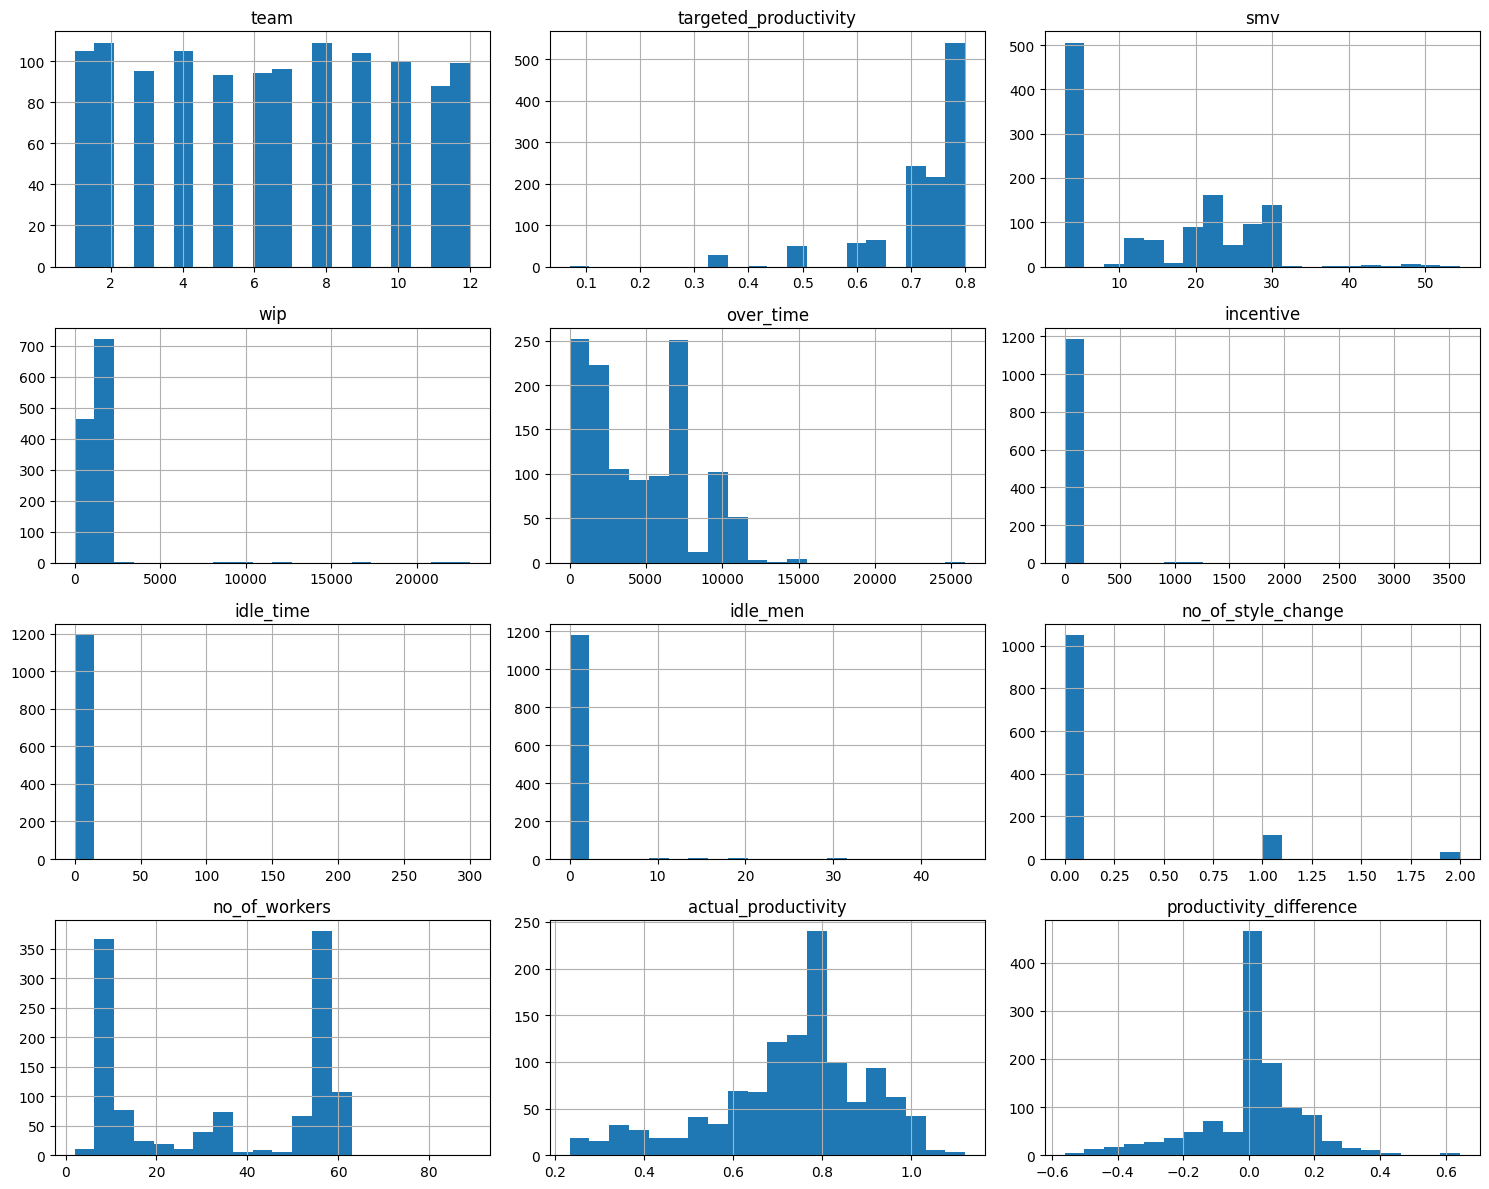

In [ ]:
df.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

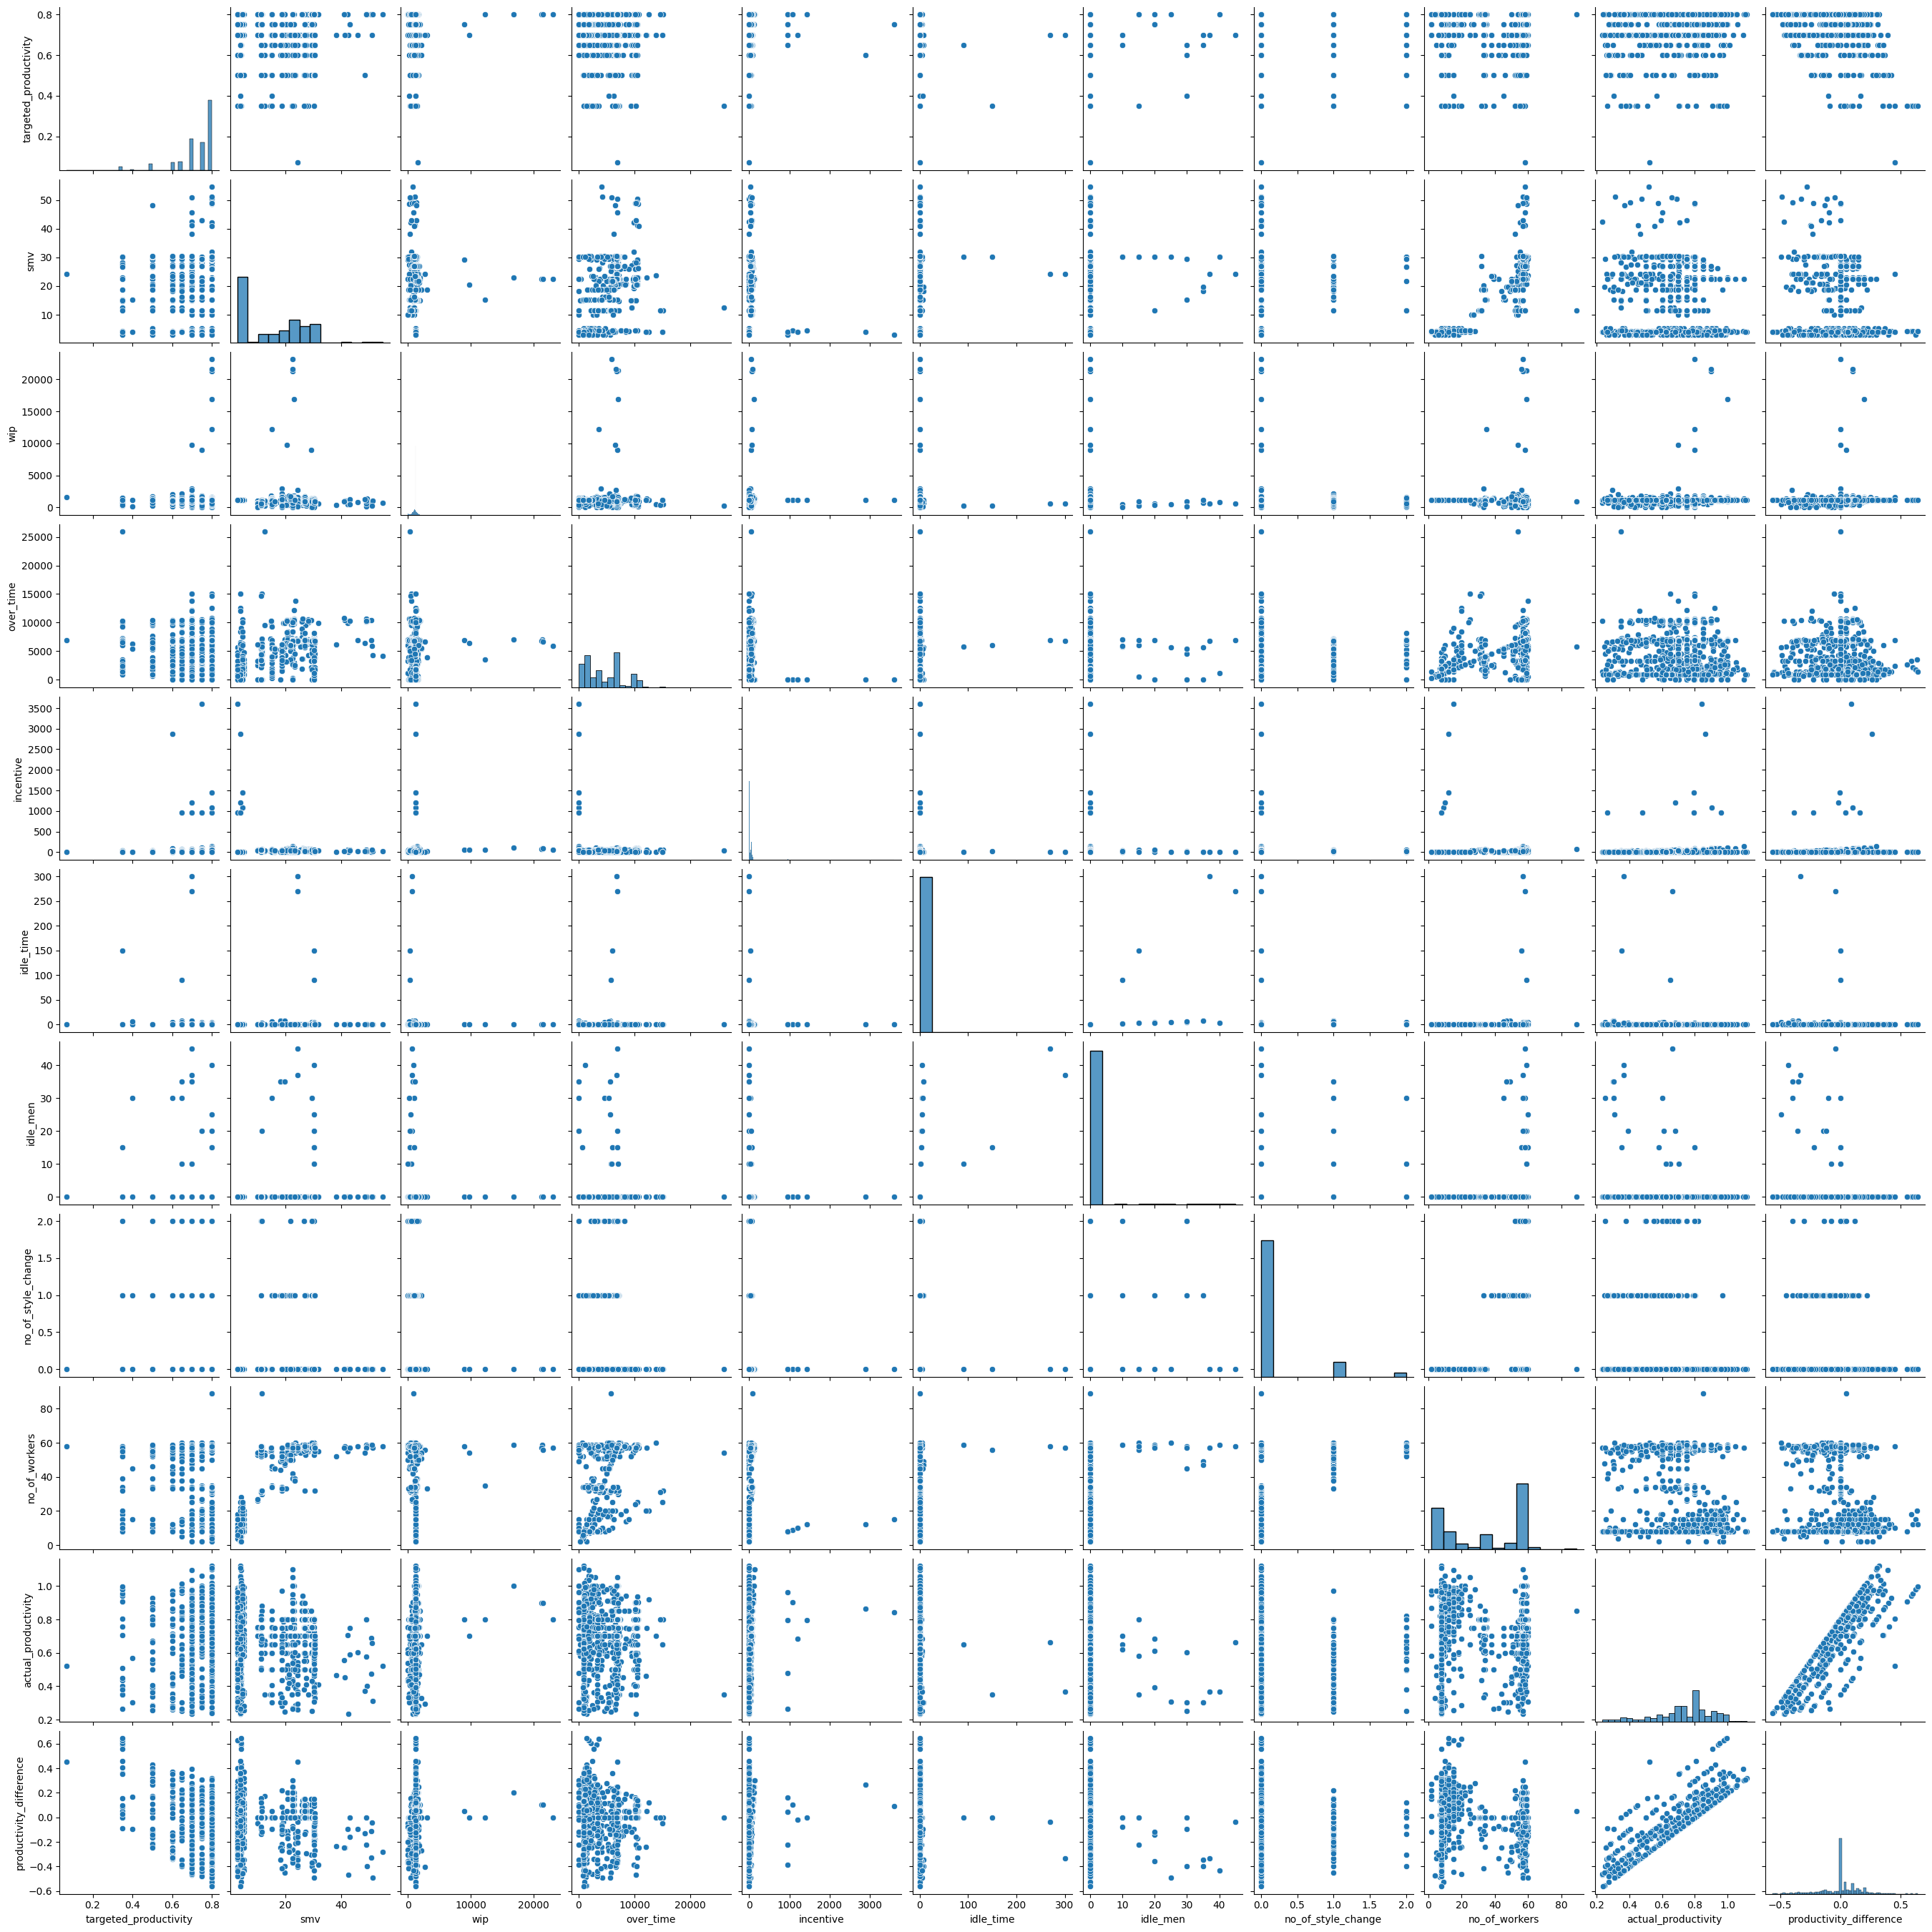

In [ ]:
numeric_columns = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
    'actual_productivity', 'productivity_difference'
]
sns.pairplot(df[numeric_columns])
plt.show()

<ipython-input-16-7becf3628c88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'team', data = df, palette=["#E41A1C", "#377EB8"])
<ipython-input-16-7becf3628c88>:1: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x = 'team', data = df, palette=["#E41A1C", "#377EB8"])


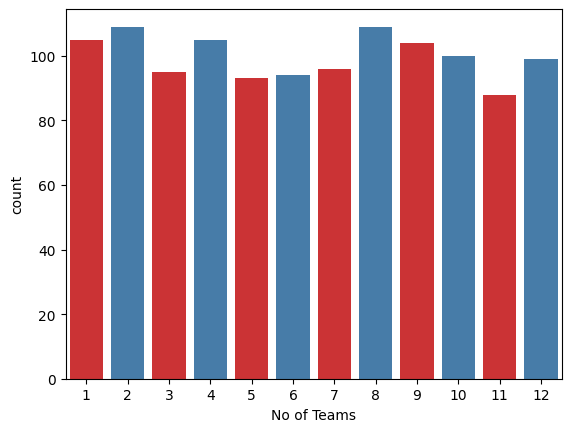

In [ ]:
ax = sns.countplot(x = 'team', data = df, palette=["#E41A1C", "#377EB8"])
plt.xlabel('No of Teams')
plt.show()

## Outlier data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity'),
  Text(11, 0, 'productivity_difference')])

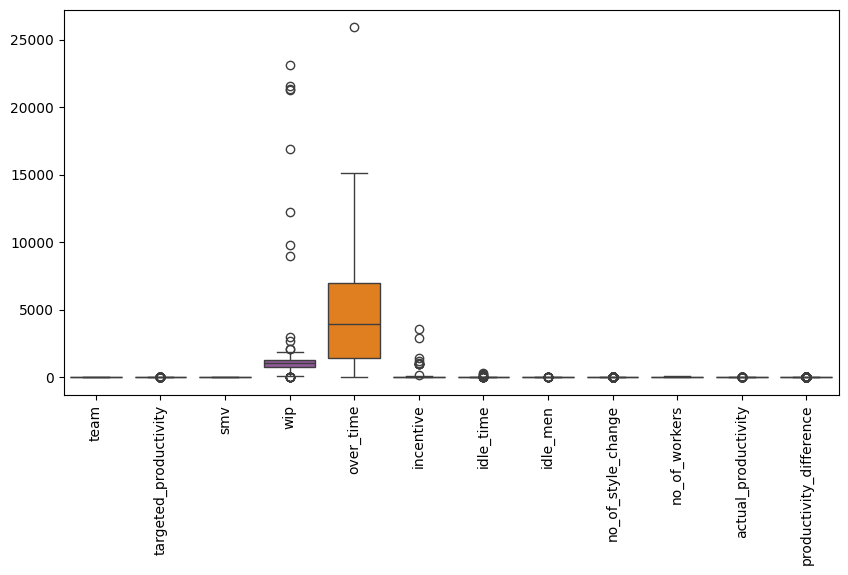

In [ ]:
palette = "Set1"
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df, orient ='v',width=0.8, palette = palette)
plt.xticks(rotation=90)

In [ ]:
def detect_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def detect_outliers_z_score(df, column):
    thres = 3

    df_cleaned = df.dropna(subset=[column])

    mean = np.mean(df_cleaned[column])
    std = np.std(df_cleaned[column])

    z_scores = (df_cleaned[column] - mean) / std

    outliers = df_cleaned.loc[np.abs(z_scores) > thres]

    return outliers

In [ ]:
outliers = detect_outliers_z_score(df, 'wip')

outliers

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
561,2/2/15,Quarter1,sewing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,59.0,1.000602,0.200602
563,2/2/15,Quarter1,sewing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,59.0,0.900158,0.100158
564,2/2/15,Quarter1,sewing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142,0.100142
565,2/2/15,Quarter1,sewing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130,0.100130
568,2/2/15,Quarter1,sewing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402,0.000402
569,2/2/15,Quarter1,sewing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,57.0,0.800393,0.000393
570,2/2/15,Quarter1,sewing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963,0.049963
572,2/2/15,Quarter1,sewing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398,0.000398


In [ ]:
outliers.index

Int64Index([561, 563, 564, 565, 568, 569, 570, 572], dtype='int64')

In [ ]:
df.shape

(1197, 16)

In [ ]:
df = df.drop(outliers.index)

In [ ]:
df.shape

(1189, 16)

In [ ]:
columns_iqr = ['smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']

for col in columns_iqr:
    outliers = detect_outliers_IQR(df, col)
    df = df.drop(outliers.index)
    print(f"For column {col}: Number of outliers dropped: {len(outliers)}")

For column smv: Number of outliers dropped: 0
For column over_time: Number of outliers dropped: 1
For column incentive: Number of outliers dropped: 11
For column idle_time: Number of outliers dropped: 18
For column idle_men: Number of outliers dropped: 0
For column no_of_style_change: Number of outliers dropped: 138
For column no_of_workers: Number of outliers dropped: 0


In [ ]:
df.shape

(1021, 16)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity'),
  Text(11, 0, 'productivity_difference')])

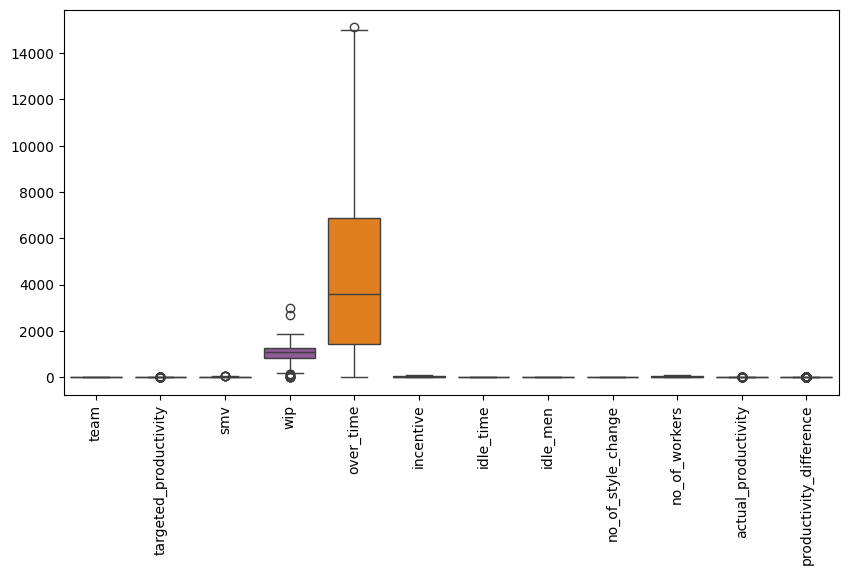

In [ ]:
# Plotting after removing Outliers

plt.figure(figsize=(10,5))
p = sns.boxplot(data = df, orient ='v',width=0.8, palette = palette)
plt.xticks(rotation=90)

## Missing data

In [ ]:
# Handing Missing Values
df.isnull().sum()

date                         0
quarter                      0
department                   0
day                          0
team                         0
targeted_productivity        0
smv                          0
wip                        496
over_time                    0
incentive                    0
idle_time                    0
idle_men                     0
no_of_style_change           0
no_of_workers                0
actual_productivity          0
productivity_difference      0
dtype: int64

In [ ]:
df['wip'] = df['wip'].fillna(round(df['wip'].mean()))

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                        0
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
productivity_difference    0
dtype: int64

## Data Encoding

In [ ]:
df['Target_label']=np.nan
df.head()
df.loc[df['productivity_difference'] < 0,'Target_label'] = -1
df.loc[df['productivity_difference'] >= 0, 'Target_label'] = 1
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference,Target_label
0,1/1/15,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725,1.0
1,1/1/15,Quarter1,finishing,Thursday,1,0.75,3.94,1041.0,960,0,0.0,0,0,8.0,0.886500,0.136500,1.0
2,1/1/15,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,31.0,0.800570,0.000570,1.0
3,1/1/15,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,31.0,0.800570,0.000570,1.0
4,1/1/15,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382,1.0


In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")

df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'productivity_difference', 'Target_label', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sewing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["no_of_style_change_enc"] = le.fit_transform(df["no_of_style_change"])
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
0,1/1/15,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,0,0,0,1,0,0,0,0,0
1,1/1/15,Quarter1,finishing,Thursday,1,0.75,3.94,1041.0,960,0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/15,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,0,0,0,0,0,0,1,0,0
3,1/1/15,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,0,0,0,0,0,0,0,1,0
4,1/1/15,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'productivity_difference', 'Target_label', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sewing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'no_of_style_change_enc'],
      dtype='object')

## Imbalanced data

In [ ]:
!pip install imbalanced-learn

<ipython-input-160-54107d571b53>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')


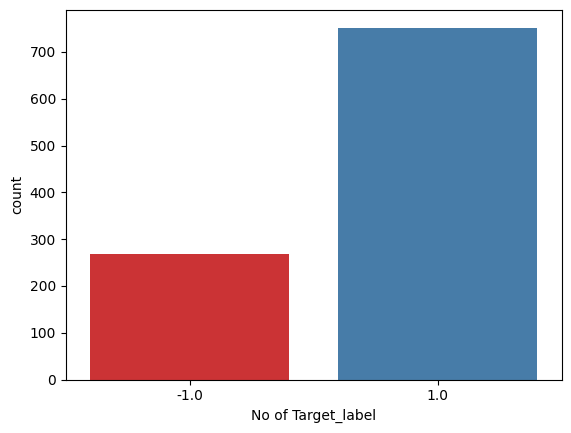

In [ ]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [ ]:
import imblearn

In [ ]:
df = df.drop(['quarter', 'department', 'day', 'team', 'date', 'targeted_productivity','actual_productivity', 'productivity_difference' ],axis=1)

In [ ]:
df.columns

Index(['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'Target_label',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc'],
      dtype='object')

In [ ]:
df.head()

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target_label,quarter_Quarter1,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
0,26.16,1108.0,7080,98,0.0,0,0,59.0,1.0,1,...,0,0,0,0,1,0,0,0,0,0
1,3.94,1041.0,960,0,0.0,0,0,8.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,11.41,968.0,3660,50,0.0,0,0,31.0,1.0,1,...,0,0,0,0,0,0,0,1,0,0
3,11.41,968.0,3660,50,0.0,0,0,31.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,25.90,1170.0,1920,50,0.0,0,0,56.0,1.0,1,...,0,0,1,0,0,0,0,0,0,0


<ipython-input-165-54107d571b53>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')


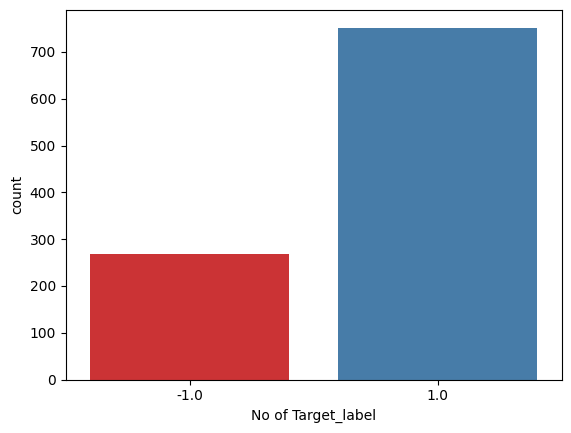

In [ ]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Target_label', axis=1)
y = df['Target_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)

<ipython-input-167-16ea4844ac59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Target_label', data = df_smote, palette='Set1')


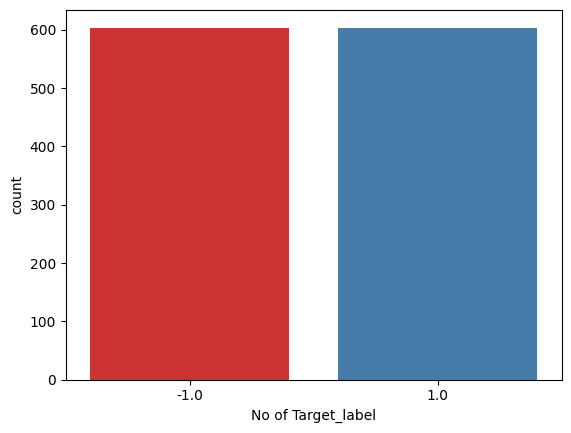

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)


df_smote = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
ax = sns.countplot(x = 'Target_label', data = df_smote, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [ ]:
X_train.shape

(1208, 34)

In [ ]:
y_train.shape

(1208,)

In [ ]:
X_test.shape

(205, 34)

In [ ]:
y_test.shape

(205,)

In [ ]:
df.head()

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target_label,quarter_Quarter1,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
0,26.16,1108.0,7080,98,0.0,0,0,59.0,1.0,1,...,0,0,0,0,1,0,0,0,0,0
1,3.94,1041.0,960,0,0.0,0,0,8.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,11.41,968.0,3660,50,0.0,0,0,31.0,1.0,1,...,0,0,0,0,0,0,0,1,0,0
3,11.41,968.0,3660,50,0.0,0,0,31.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
4,25.90,1170.0,1920,50,0.0,0,0,56.0,1.0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import confusion_matrix

df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])
models_trained_list = []

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')


def get_perf_metrics(model, parameters_config, i):
    model_name = type(model).__name__
    cv = GridSearchCV(model, parameters_config[i], cv=5)
    cv.fit(X_train,y_train.values.ravel())
    display(cv)

    model = cv.best_estimator_

    print("Training {} model...".format(model_name))
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    y_pred = model.predict(X_test)


    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - {}'.format(model_name))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ]

    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
models_list = [
               KNeighborsClassifier(),
               SVC(),
               DecisionTreeClassifier(),
               MLPClassifier(),
               ]

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (32, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001]
}

parameters_configs = [knn_param_grid, svc_param_grid, dt_param_grid, nn_param_grid]

Best parameters are: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}


0.788 + or -0.037 for the {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.794 + or -0.087 for the {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.786 + or -0.037 for the {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.797 + or -0.085 for the {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.8 + or -0.04 for the {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.803 + or -0.087 for the {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.796 + or -0.04 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.815 + or -0.074 for the {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.789 + or -0.036 for the {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.792 + or -0.089 for the {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.787 + 

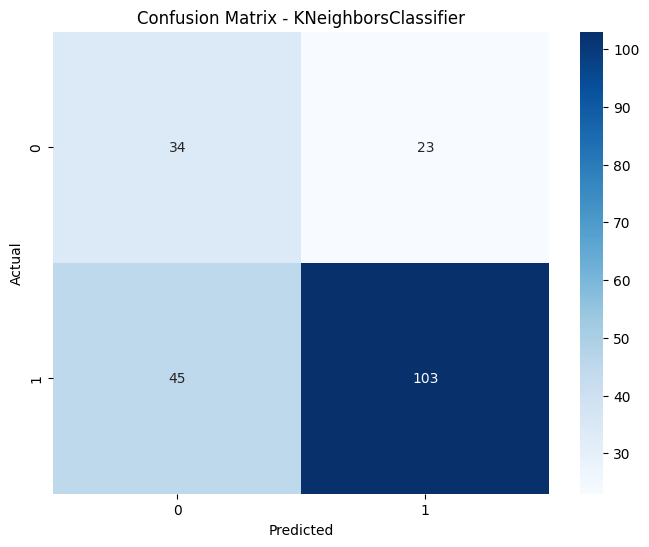

Completed KNeighborsClassifier model's performance assessment.
Best parameters are: {'C': 10, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}


0.767 + or -0.081 for the {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
0.692 + or -0.026 for the {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.709 + or -0.04 for the {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
0.767 + or -0.081 for the {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.773 + or -0.173 for the {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.818 + or -0.112 for the {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
0.767 + or -0.081 for the {'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'linear'}
0.545 + or -0.031 for the {'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'rbf'}
0.81 + or -0.104 for the {'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
0.767 + or -0.081 for the {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
0.692 + or -0.026 for the {'C': 0.1, 'degree':

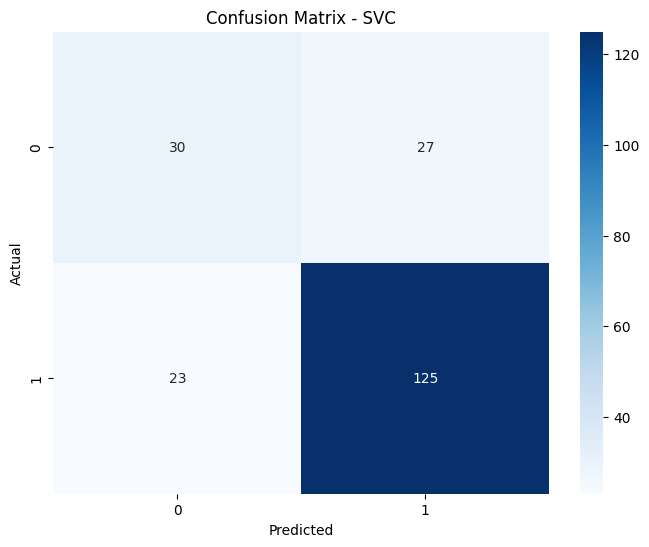

Completed SVC model's performance assessment.
Best parameters are: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


0.814 + or -0.075 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.808 + or -0.061 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.809 + or -0.066 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.808 + or -0.061 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.802 + or -0.068 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.806 + or -0.065 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.817 + or -0.062 for the {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.818 + or -0.061 for the {'criterion': 'g

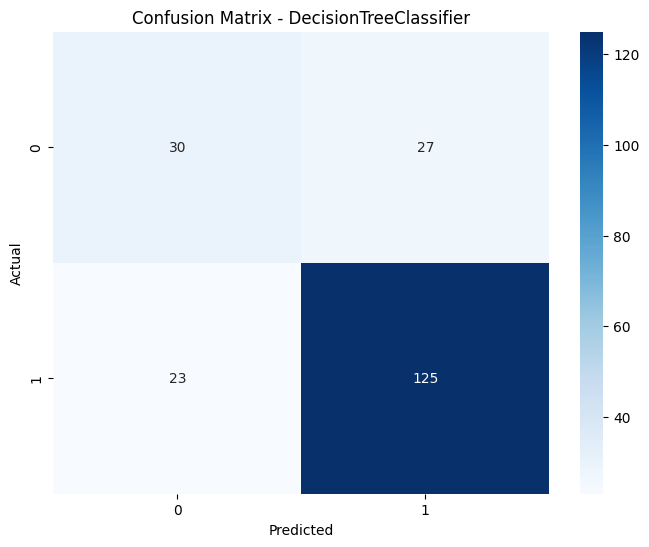

Completed DecisionTreeClassifier model's performance assessment.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters are: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}


0.823 + or -0.126 for the {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
0.82 + or -0.111 for the {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
0.817 + or -0.109 for the {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64), 'solver': 'adam'}
0.83 + or -0.107 for the {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
0.823 + or -0.108 for the {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
0.816 + or -0.12 for the {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32, 64), 'solver': 'adam'}
0.808 + or -0.145 for the {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
0.814 + or -0.135 for the {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 's

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed MLPClassifier model training.


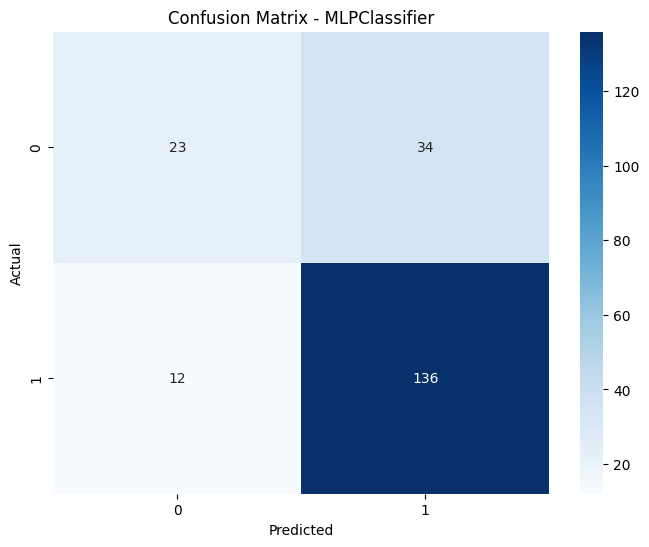

Completed MLPClassifier model's performance assessment.


In [ ]:
for n, model in enumerate(models_list):
    get_perf_metrics(model, parameters_configs, n)

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,KNeighborsClassifier,0.999172,0.668293,0.817460,0.695946,0.751825
1,SVC,0.981788,0.756098,0.822368,0.844595,0.833333
2,DecisionTreeClassifier,0.999172,0.756098,0.822368,0.844595,0.833333
3,MLPClassifier,0.894868,0.775610,0.800000,0.918919,0.855346
